<a href="https://colab.research.google.com/github/SimeonHristov99/AI_HandwrittenDigitClassifier_Tensorflow/blob/main/TensorflowMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

Handwritten digit classifier
------------

The goal of this project is to build and train a digit classifier based on the [MNIST](https://wiki.pathmind.com/mnist) dataset. This is achieved by using [Tensorflow](https://www.tensorflow.org/).

### NOTE: The Keras API is only used to get the dataset, i.e. the neural networks are built using the [nn module](https://www.tensorflow.org/api_docs/python/tf/nn).

# 1. Preparation

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

### There are 60000 training images with dimensions 28 x 28. In other words, each sample is a square matrx and every element in that matrix is a value of a pixel. The lower the value the less "activation" that pixel has.

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


In [42]:
X_train.dtype

dtype('uint8')

## There are 10 classes to predict - each label is the actual digit

In [43]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Use 20% of the training set to make a validation set

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

NUM_TRAIN = X_train.shape[0]

print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (48000, 28, 28) (48000,)
Validation set: (12000, 28, 28) (12000,)
Test set: (10000, 28, 28) (10000,)


## Since gradient descent will be used for training, scale the input features by dividing by 255

NOTE: Since they are initially of type 'uint8' the scaling process will also convert them to floats.

In [45]:
X_train = X_train / 255
X_val = X_val / 255

np.unique(X_train[0]) # make sure scaling worked

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01960784,
       0.02352941, 0.02745098, 0.03529412, 0.03921569, 0.04313725,
       0.04705882, 0.05098039, 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.10196078, 0.10588235, 0.10980392, 0.12156863,
       0.1254902 , 0.12941176, 0.1372549 , 0.14901961, 0.15294118,
       0.18039216, 0.18431373, 0.20784314, 0.21176471, 0.24313725,
       0.25490196, 0.25882353, 0.2745098 , 0.27843137, 0.28235294,
       0.28627451, 0.30196078, 0.31764706, 0.32156863, 0.33333333,
       0.3372549 , 0.34509804, 0.35686275, 0.36862745, 0.38823529,
       0.40392157, 0.42352941, 0.43921569, 0.44705882, 0.45098039,
       0.4745098 , 0.49803922, 0.51764706, 0.52941176, 0.5372549 ,
       0.54117647, 0.55686275, 0.56862745, 0.57254902, 0.58823529,
       0.6       , 0.60392157, 0.61176471, 0.63921569, 0.64313725,
       0.6627451 , 0.67058824, 0.6745098 , 0.68235294, 0.69019608,
       0.69803922, 0.71372549, 0.71764706, 0.72156863, 0.72941

## 10 random samples

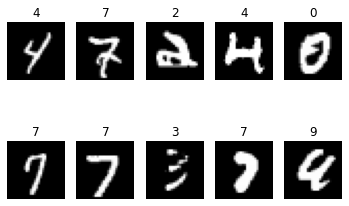

In [46]:
for i in range(10):
  plt.subplot(2, 5, i + 1)
  sample_idx = np.random.randint(NUM_TRAIN) # generate random number between 0 and 59_999
  image = X_train[sample_idx] # get that image
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(y_train[sample_idx])

plt.show()

## Batch and shuffle

In [ ]:
batch_size = 16
train_tf_dataset = tf.data.Dataset.from_tensor_slices(
    (train_dataset, train_labels)).shuffle(1000).batch(batch_size)

# 2. Building and training model

## Define the model
  - Layer 1: Flattening layer. Used to combine all pixels in one big vector.
  - Layer 2: Dense hidden layer with 300 neurons. It will use the ReLU activation function.
  - Layer 3: Dense hidden layer with 100 neurons. It will use the ReLU activation function.
  - Layer 4: Dense output layer with 10 neurons (one per class/digit label). It will use the softmax activation function.

NOTE: Inspiration for the model: [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)

In [47]:
# layer 2
W2 = tf.Variable(tf.random.truncated_normal((300, ), stddev=0.1))
b2 = tf.Variable(tf.constant(1.0, shape=(300, )))

# layer 3
W3 = tf.Variable(tf.random.truncated_normal((100, ), stddev=0.1))
b3 = tf.Variable(tf.constant(1.0, shape=(100, )))

# layer 4
W4 = tf.Variable(tf.random.truncated_normal((10, ), stddev=0.1))
b4 = tf.Variable(tf.constant(1.0, shape=(10, )))

def model(data):
  X = np.flatten(data)

  hidden1 = tf.nn.relu(tf.matmul(X, W2) + b2)
  hidden2 = tf.nn.relu(tf.matmul(hidden1, W3) + b3)

  return tf.matmul(hidden2, W4) + b4

## Compute loss

In [48]:
def compute_loss(labels, logits):
  loss = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels)
  cost = tf.reduce_mean(loss)
  return cost

## Compute accuracy

In [49]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

## Test and improve model

In [50]:
num_steps = 1000
display_step = 100
learning_rate = 0.05

optimizer = tf.keras.optimizers.SGD(learning_rate)

# Run training for the given number of steps.
for step, data in enumerate(X_train):
  # Training computation.
  with tf.GradientTape() as g:
    logits = model(data)
    loss = compute_loss(y_train, logits)

  # Optimizer.
  optimizer.minimize(loss, g.watched_variables(), tape=g)

  # Predictions for the training, validation, and test data.
  if step % display_step == 0:
    train_prediction = tf.nn.softmax(logits)
    train_acc = accuracy(train_prediction, batch_y)
    
    valid_prediction = tf.nn.softmax(model(X_val))
    valid_acc = accuracy(valid_prediction, y_val)
    print("step: %i, loss: %f, train acc: %f, validation acc: %f" % (step, loss, train_acc, valid_acc))

test_prediction = tf.nn.softmax(model(X_test))
test_acc = accuracy(test_prediction, y_test)
print("test acc: %f" % (test_acc))

AttributeError: ignored